In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from scipy.stats import uniform, expon
import sympy as sp
from IPython.display import display, Math, Latex

print("Лабораторная работа по теории вероятностей")
print("=" * 60)

Лабораторная работа по теории вероятностей


In [2]:
print("Задание 1: Зависимость событий")
print("=" * 40)

def analyze_events():
    results = []

    # (a) Несовместные события
    results.append("(a) Несовместные события: ЗАВИСИМЫ")
    results.append("Обоснование: Если P(A∩B)=0 и P(A)>0, P(B)>0, то P(A∩B) ≠ P(A)P(B)")

    # (b) События, образующие σ-алгебру
    results.append("(b) События σ-алгебры: МОГУТ БЫТЬ КАК ЗАВИСИМЫМИ, ТАК И НЕЗАВИСИМЫМИ")
    results.append("Обоснование: σ-алгебра содержит Ω и ∅, которые независимы с любыми событиями, но другие события могут быть зависимыми")

    # (c) События с одинаковой вероятностью
    results.append("(c) События с одинаковой вероятностью: МОГУТ БЫТЬ КАК ЗАВИСИМЫМИ, ТАК И НЕЗАВИСИМЫМИ")
    results.append("Обоснование: Равенство вероятностей не гарантирует независимость")

    return results

for result in analyze_events():
    print(result)
    print("-" * 50)

Задание 1: Зависимость событий
(a) Несовместные события: ЗАВИСИМЫ
--------------------------------------------------
Обоснование: Если P(A∩B)=0 и P(A)>0, P(B)>0, то P(A∩B) ≠ P(A)P(B)
--------------------------------------------------
(b) События σ-алгебры: МОГУТ БЫТЬ КАК ЗАВИСИМЫМИ, ТАК И НЕЗАВИСИМЫМИ
--------------------------------------------------
Обоснование: σ-алгебра содержит Ω и ∅, которые независимы с любыми событиями, но другие события могут быть зависимыми
--------------------------------------------------
(c) События с одинаковой вероятностью: МОГУТ БЫТЬ КАК ЗАВИСИМЫМИ, ТАК И НЕЗАВИСИМЫМИ
--------------------------------------------------
Обоснование: Равенство вероятностей не гарантирует независимость
--------------------------------------------------


In [3]:
print("\nЗадание 2: События с монетами")
print("=" * 40)

def coin_events():
    # Определим элементарные события: (монета1, монета2)
    # Г - герб, Р - решка
    omega = [('Г','Г'), ('Г','Р'), ('Р','Г'), ('Р','Р')]

    # Определим события
    events = {
        'A': [('Г','Г'), ('Г','Р')],  # герб на 1-й монете
        'B': [('Р','Г'), ('Р','Р')],  # решка на 1-й монете
        'C': [('Г','Г'), ('Р','Г')],  # герб на 2-й монете
        'D': [('Г','Р'), ('Р','Р')],  # решка на 2-й монете
        'E': [('Г','Г'), ('Г','Р'), ('Р','Г')],  # хотя бы один герб
        'F': [('Г','Р'), ('Р','Г'), ('Р','Р')],  # хотя бы одна решка
        'G': [('Г','Р'), ('Р','Г')],  # один герб и одна решка
        'H': [('Р','Р')],  # нет гербов
        'K': [('Г','Г')]   # два герба
    }

    # Функция для нахождения объединения событий
    def union(event1, event2):
        return list(set(event1 + event2))

    # Функция для нахождения пересечения событий
    def intersection(event1, event2):
        return [elem for elem in event1 if elem in event2]

    # Вычисления
    results = []

    # (a) A + C (объединение)
    A_plus_C = union(events['A'], events['C'])
    for name, event in events.items():
        if set(event) == set(A_plus_C):
            results.append(f"(a) A + C = {name}")
            break

    # (b) AC (пересечение)
    A_times_C = intersection(events['A'], events['C'])
    for name, event in events.items():
        if set(event) == set(A_times_C):
            results.append(f"(b) AC = {name}")
            break

    # (c) EF (пересечение)
    E_times_F = intersection(events['E'], events['F'])
    for name, event in events.items():
        if set(event) == set(E_times_F):
            results.append(f"(c) EF = {name}")
            break

    # (d) G + E (объединение)
    G_plus_E = union(events['G'], events['E'])
    for name, event in events.items():
        if set(event) == set(G_plus_E):
            results.append(f"(d) G + E = {name}")
            break

    # (e) GE (пересечение)
    G_times_E = intersection(events['G'], events['E'])
    for name, event in events.items():
        if set(event) == set(G_times_E):
            results.append(f"(e) GE = {name}")
            break

    # (f) BD (пересечение)
    B_times_D = intersection(events['B'], events['D'])
    for name, event in events.items():
        if set(event) == set(B_times_D):
            results.append(f"(f) BD = {name}")
            break

    # (g) E + K (объединение)
    E_plus_K = union(events['E'], events['K'])
    for name, event in events.items():
        if set(event) == set(E_plus_K):
            results.append(f"(g) E + K = {name}")
            break

    return results

for result in coin_events():
    print(result)


Задание 2: События с монетами
(a) A + C = E
(b) AC = K
(c) EF = G
(d) G + E = E
(e) GE = G
(f) BD = H
(g) E + K = E


In [4]:
print("\nЗадание 3: Вероятность попадания в мишень")
print("=" * 50)

def target_probability():
    # Угол всей мишени
    total_angle = 360

    # Угол закрашенных секторов (два по 20 градусов)
    painted_angle = 2 * 20

    # Вероятность попадания в закрашенную область
    probability = painted_angle / total_angle

    print(f"Общий угол мишени: {total_angle}°")
    print(f"Угол закрашенных секторов: {painted_angle}°")
    print(f"Вероятность попадания в закрашенную область: {probability:.4f}")

    return probability

prob = target_probability()


Задание 3: Вероятность попадания в мишень
Общий угол мишени: 360°
Угол закрашенных секторов: 40°
Вероятность попадания в закрашенную область: 0.1111



Задание 4: Задача о пароходах
Время суток: 24 часов
Время стоянки первого парохода: 1 час
Время стоянки второго парохода: 2 часа
Вероятность ожидания: -0.7587


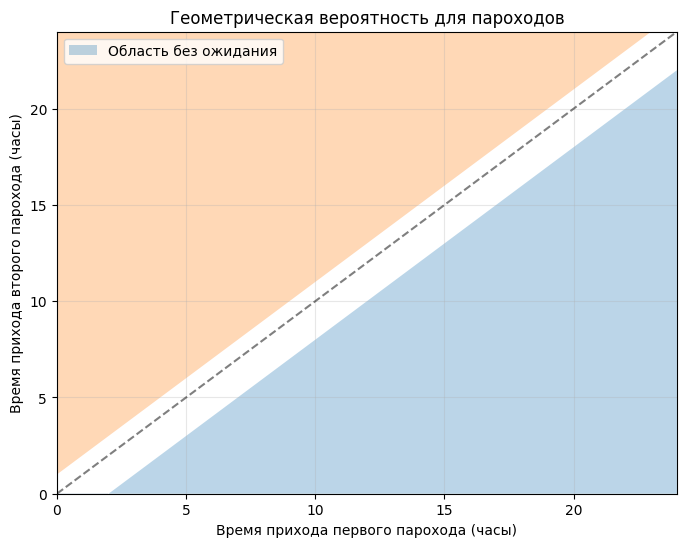

In [5]:
print("\nЗадание 4: Задача о пароходах")
print("=" * 45)

def ships_probability():
    # Время в часах
    total_time = 24
    wait_time1 = 1  # время стоянки первого
    wait_time2 = 2  # время стоянки второго

    # Геометрическая вероятность
    # Площадь квадрата
    square_area = total_time ** 2

    # Площадь области, где нет ожидания
    # |t1 - t2| > max(wait_time1, wait_time2)
    no_wait_area = (total_time - wait_time1) ** 2 + (total_time - wait_time2) ** 2

    # Вероятность того, что одному придется ждать
    probability = 1 - no_wait_area / square_area

    print(f"Время суток: {total_time} часов")
    print(f"Время стоянки первого парохода: {wait_time1} час")
    print(f"Время стоянки второго парохода: {wait_time2} часа")
    print(f"Вероятность ожидания: {probability:.4f}")

    # Визуализация
    fig, ax = plt.subplots(figsize=(8, 6))

    # Область без ожидания
    x = np.linspace(0, total_time, 100)
    y1 = x - wait_time2
    y2 = x + wait_time1

    ax.fill_between(x, 0, y1, alpha=0.3, label='Область без ожидания')
    ax.fill_between(x, y2, total_time, alpha=0.3)
    ax.plot([0, total_time], [0, total_time], 'k--', alpha=0.5)
    ax.set_xlim(0, total_time)
    ax.set_ylim(0, total_time)
    ax.set_xlabel('Время прихода первого парохода (часы)')
    ax.set_ylabel('Время прихода второго парохода (часы)')
    ax.set_title('Геометрическая вероятность для пароходов')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

    return probability

ship_prob = ships_probability()

In [6]:
print("\nЗадание 5: Поражение самолета")
print("=" * 40)

def airplane_probability():
    # Вероятности попадания в части
    p1, p2, p3 = 0.3, 0.4, 0.3  # примерные вероятности

    print("Условия поражения:")
    print("- 1 попадание в 1-ю часть (кабина + двигатель)")
    print("- 2 попадания во 2-ю часть (топливные баки)")
    print("- 3 попадания в 3-ю часть (планер)")
    print(f"\nВероятности попадания: p1={p1}, p2={p2}, p3={p3}")

    results = {}

    # m = 1
    m1 = 1
    P_A_m1 = p1  # только попадание в 1-ю часть
    results[1] = P_A_m1

    # m = 2
    m2 = 2
    # Варианты поражения:
    # - хотя бы одно попадание в 1-ю часть
    # - два попадания во 2-ю часть
    P_A_m2 = (1 - (1-p1)**2) + (p2**2) - (1 - (1-p1)**2)*p2**2
    results[2] = P_A_m2

    # m = 3
    m3 = 3
    # Варианты поражения:
    # - хотя бы одно попадание в 1-ю часть
    # - хотя бы два попадания во 2-ю часть
    # - три попадания в 3-ю часть
    P_no_first = (1-p1)**3
    P_less_than_two_second = sum([3*p2**k*(1-p2)**(3-k) for k in range(2)])
    P_three_third = p3**3

    P_A_m3 = 1 - P_no_first * P_less_than_two_second * (1 - P_three_third)
    results[3] = P_A_m3

    # m = 4
    m4 = 4
    # При 4 попаданиях самолет гарантированно поражен
    # (либо есть попадание в 1-ю часть, либо 2+ во 2-ю, либо 3+ в 3-ю)
    P_A_m4 = 1.0
    results[4] = P_A_m4

    print("\nРезультаты:")
    for m, prob in results.items():
        print(f"P(A|m={m}) = {prob:.6f}")

    return results

airplane_probs = airplane_probability()



Задание 5: Поражение самолета
Условия поражения:
- 1 попадание в 1-ю часть (кабина + двигатель)
- 2 попадания во 2-ю часть (топливные баки)
- 3 попадания в 3-ю часть (планер)

Вероятности попадания: p1=0.3, p2=0.4, p3=0.3

Результаты:
P(A|m=1) = 0.300000
P(A|m=2) = 0.588400
P(A|m=3) = 0.639562
P(A|m=4) = 1.000000


In [7]:
print("\nЗадание 1: Проверка функции плотности")
print("=" * 50)

def check_density_function():
    def f(x, y):
        return np.exp(-2 * np.abs(y)) / (np.pi * (1 + x**2))

    # Проверка неотрицательности
    test_points = [(0, 0), (1, 1), (-1, -1), (10, 10)]
    negative_found = False
    for x, y in test_points:
        if f(x, y) < 0:
            negative_found = True
            break

    # Проверка нормировки (интеграл по всей плоскости = 1)
    def integrand(y, x):
        return f(x, y)

    # Интегрируем по x от -∞ до +∞ и по y от -∞ до +∞
    result, error = integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])

    print(f"Функция неотрицательна: {not negative_found}")
    print(f"Интеграл по всей плоскости: {result:.6f}")
    print(f"Погрешность интегрирования: {error:.6e}")

    if not negative_found and abs(result - 1) < 1e-6:
        print("Вывод: Данная функция ЯВЛЯЕТСЯ плотностью распределения")
        return True
    else:
        print("Вывод: Данная функция НЕ ЯВЛЯЕТСЯ плотностью распределения")
        return False

is_density = check_density_function()


Задание 1: Проверка функции плотности
Функция неотрицательна: True
Интеграл по всей плоскости: 1.000000
Погрешность интегрирования: 1.400576e-08
Вывод: Данная функция ЯВЛЯЕТСЯ плотностью распределения


In [8]:
print("\nЗадание 2: Совместное распределение")
print("=" * 50)

def joint_distribution():
    # Создаем таблицу совместного распределения
    joint_table = np.array([
        [1/8, 1/12, 7/24],  # ξ = -1
        [1/3, 1/6, 0]       # ξ = 1
    ])

    print("Совместное распределение:")
    print("     η=-1    η=0     η=1")
    print(f"ξ=-1 {joint_table[0,0]:.3f}   {joint_table[0,1]:.3f}   {joint_table[0,2]:.3f}")
    print(f"ξ=1  {joint_table[1,0]:.3f}   {joint_table[1,1]:.3f}   {joint_table[1,2]:.3f}")

    # (a) Маргинальные распределения
    p_xi = np.sum(joint_table, axis=1)  # суммы по строкам
    p_eta = np.sum(joint_table, axis=0) # суммы по столбцам

    print(f"\n(a) Маргинальные распределения:")
    print(f"P(ξ=-1) = {p_xi[0]:.3f}, P(ξ=1) = {p_xi[1]:.3f}")
    print(f"P(η=-1) = {p_eta[0]:.3f}, P(η=0) = {p_eta[1]:.3f}, P(η=1) = {p_eta[2]:.3f}")

    # (b) Числовые характеристики
    # Математические ожидания
    E_xi = -1 * p_xi[0] + 1 * p_xi[1]
    E_eta = -1 * p_eta[0] + 0 * p_eta[1] + 1 * p_eta[2]

    # Дисперсии
    E_xi2 = 1 * p_xi[0] + 1 * p_xi[1]  # ξ² всегда равно 1
    E_eta2 = 1 * p_eta[0] + 0 * p_eta[1] + 1 * p_eta[2]

    D_xi = E_xi2 - E_xi**2
    D_eta = E_eta2 - E_eta**2

    # Ковариация
    # E[ξη] = ΣΣ xi*eta * P(ξ=xi, η=eta)
    E_xi_eta = 0
    for i, xi in enumerate([-1, 1]):
        for j, eta in enumerate([-1, 0, 1]):
            E_xi_eta += xi * eta * joint_table[i, j]

    cov_xi_eta = E_xi_eta - E_xi * E_eta

    # Корреляция
    corr_xi_eta = cov_xi_eta / np.sqrt(D_xi * D_eta)

    print(f"\n(b) Числовые характеристики:")
    print(f"E[ξ] = {E_xi:.3f}, E[η] = {E_eta:.3f}")
    print(f"D[ξ] = {D_xi:.3f}, D[η] = {D_eta:.3f}")
    print(f"cov(ξ,η) = {cov_xi_eta:.3f}")
    print(f"ρ(ξ,η) = {corr_xi_eta:.3f}")

    # (c) Проверка независимости и некоррелированности
    independent = True
    for i in range(2):
        for j in range(3):
            if abs(joint_table[i, j] - p_xi[i] * p_eta[j]) > 1e-10:
                independent = False
                break

    uncorrelated = abs(corr_xi_eta) < 1e-10

    print(f"\n(c) Исследование:")
    print(f"Независимы: {'ДА' if independent else 'НЕТ'}")
    print(f"Некоррелированы: {'ДА' if uncorrelated else 'НЕТ'}")

    return joint_table, p_xi, p_eta

joint_table, p_xi, p_eta = joint_distribution()


Задание 2: Совместное распределение
Совместное распределение:
     η=-1    η=0     η=1
ξ=-1 0.125   0.083   0.292
ξ=1  0.333   0.167   0.000

(a) Маргинальные распределения:
P(ξ=-1) = 0.500, P(ξ=1) = 0.500
P(η=-1) = 0.458, P(η=0) = 0.250, P(η=1) = 0.292

(b) Числовые характеристики:
E[ξ] = 0.000, E[η] = -0.167
D[ξ] = 1.000, D[η] = 0.722
cov(ξ,η) = -0.500
ρ(ξ,η) = -0.588

(c) Исследование:
Независимы: НЕТ
Некоррелированы: НЕТ


In [9]:
print("\nЗадание 3: Тетраэдры")
print("=" * 35)

def tetrahedrons():
    # Все возможные исходы
    outcomes = []
    for i in range(1, 5):  # ξ1
        for j in range(1, 5):  # ξ2
            outcomes.append((i, j))

    # Случайные величины
    # ξ = ξ1 + ξ2
    # η = 1 если ξ1 > ξ2, иначе 0

    # Создаем таблицу совместного распределения
    # ξ может быть от 2 до 8, η - 0 или 1
    xi_values = list(range(2, 9))
    eta_values = [0, 1]

    joint_table = np.zeros((len(xi_values), len(eta_values)))

    for i, j in outcomes:
        xi = i + j
        eta = 1 if i > j else 0

        xi_idx = xi - 2  # т.к. xi от 2 до 8
        eta_idx = eta

        joint_table[xi_idx, eta_idx] += 1/16  # всего 16 равновероятных исходов

    print("Совместное распределение P(ξ,η):")
    print("     η=0    η=1")
    for i, xi in enumerate(xi_values):
        print(f"ξ={xi} {joint_table[i,0]:.3f}  {joint_table[i,1]:.3f}")

    # (a) Маргинальные распределения
    p_xi = np.sum(joint_table, axis=1)
    p_eta = np.sum(joint_table, axis=0)

    print(f"\n(a) Маргинальные распределения:")
    for i, xi in enumerate(xi_values):
        print(f"P(ξ={xi}) = {p_xi[i]:.3f}")
    print(f"P(η=0) = {p_eta[0]:.3f}, P(η=1) = {p_eta[1]:.3f}")

    # (b) Числовые характеристики
    E_xi = sum(xi * p_xi[i] for i, xi in enumerate(xi_values))
    E_eta = 0 * p_eta[0] + 1 * p_eta[1]

    E_xi2 = sum(xi**2 * p_xi[i] for i, xi in enumerate(xi_values))
    E_eta2 = 0**2 * p_eta[0] + 1**2 * p_eta[1]

    D_xi = E_xi2 - E_xi**2
    D_eta = E_eta2 - E_eta**2

    # Ковариация
    E_xi_eta = 0
    for i, xi in enumerate(xi_values):
        for j, eta in enumerate(eta_values):
            E_xi_eta += xi * eta * joint_table[i, j]

    cov_xi_eta = E_xi_eta - E_xi * E_eta
    corr_xi_eta = cov_xi_eta / np.sqrt(D_xi * D_eta)

    print(f"\n(b) Числовые характеристики:")
    print(f"E[ξ] = {E_xi:.3f}, E[η] = {E_eta:.3f}")
    print(f"D[ξ] = {D_xi:.3f}, D[η] = {D_eta:.3f}")
    print(f"cov(ξ,η) = {cov_xi_eta:.3f}")
    print(f"ρ(ξ,η) = {corr_xi_eta:.3f}")

    # (c) Исследование
    independent = True
    for i in range(len(xi_values)):
        for j in range(len(eta_values)):
            if abs(joint_table[i, j] - p_xi[i] * p_eta[j]) > 1e-10:
                independent = False
                break

    uncorrelated = abs(corr_xi_eta) < 1e-10

    print(f"\n(c) Исследование:")
    print(f"Независимы: {'ДА' if independent else 'НЕТ'}")
    print(f"Некоррелированы: {'ДА' if uncorrelated else 'НЕТ'}")

    return joint_table, p_xi, p_eta

tetra_joint, tetra_p_xi, tetra_p_eta = tetrahedrons()


Задание 3: Тетраэдры
Совместное распределение P(ξ,η):
     η=0    η=1
ξ=2 0.062  0.000
ξ=3 0.062  0.062
ξ=4 0.125  0.062
ξ=5 0.125  0.125
ξ=6 0.125  0.062
ξ=7 0.062  0.062
ξ=8 0.062  0.000

(a) Маргинальные распределения:
P(ξ=2) = 0.062
P(ξ=3) = 0.125
P(ξ=4) = 0.188
P(ξ=5) = 0.250
P(ξ=6) = 0.188
P(ξ=7) = 0.125
P(ξ=8) = 0.062
P(η=0) = 0.625, P(η=1) = 0.375

(b) Числовые характеристики:
E[ξ] = 5.000, E[η] = 0.375
D[ξ] = 2.500, D[η] = 0.234
cov(ξ,η) = 0.000
ρ(ξ,η) = 0.000

(c) Исследование:
Независимы: НЕТ
Некоррелированы: ДА



Задание 4: Тригонометрические преобразования ДОПИСАТЬ КОММЕНТАРИИ
(a) Числовые характеристики:
E[ξ] = 0.000
E[η1] = 0.000, E[η2] = 0.000
cov(ξ,η1) = 0.000
cov(ξ,η2) = 1.000
cov(η1,η2) = 0.000

(b) Исследование:
ξ и η1 зависимы, некоррелированы: ДА
ξ и η2 зависимы, некоррелированы: НЕТ
η1 и η2 зависимы, некоррелированы: ДА


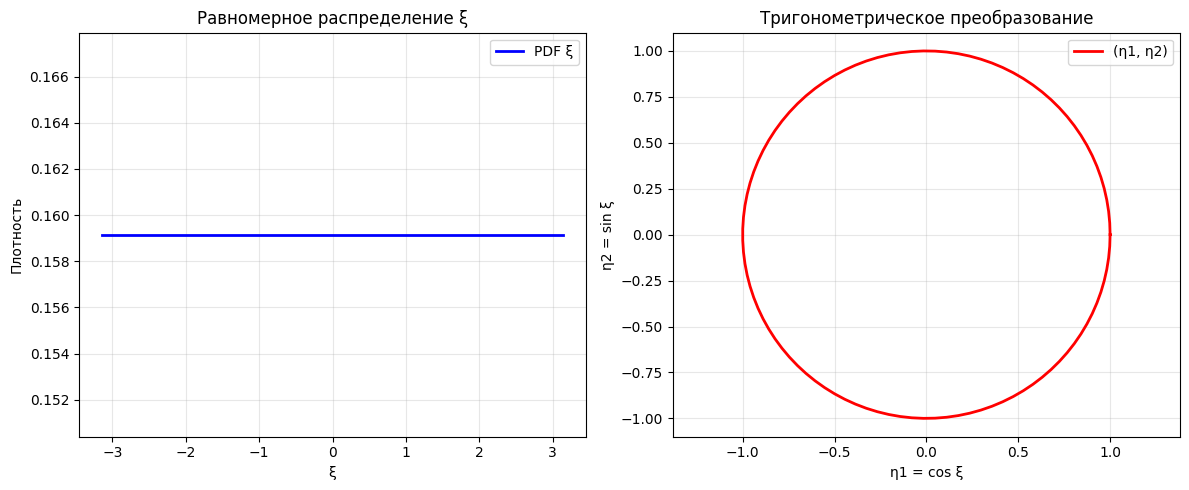

In [13]:
print("\nЗадание 4: Тригонометрические преобразования ДОПИСАТЬ КОММЕНТАРИИ")
print("=" * 55)

def trigonometric_transforms():
    # ξ ∼ U[-π, π]
    # η1 = cos ξ, η2 = sin ξ

    # (a) Числовые характеристики
    # E[ξ] для равномерного распределения
    E_xi = 0  # симметричное распределение

    # E[η1] = E[cos ξ]
    E_eta1 = (1/(2*np.pi)) * integrate.quad(lambda x: np.cos(x), -np.pi, np.pi)[0]

    # E[η2] = E[sin ξ]
    E_eta2 = (1/(2*np.pi)) * integrate.quad(lambda x: np.sin(x), -np.pi, np.pi)[0]

    # Ковариации
    # cov(ξ, η1) = E[ξ·cos ξ] - E[ξ]E[cos ξ]
    E_xi_eta1 = (1/(2*np.pi)) * integrate.quad(lambda x: x * np.cos(x), -np.pi, np.pi)[0]
    cov_xi_eta1 = E_xi_eta1 - E_xi * E_eta1

    # cov(ξ, η2) = E[ξ·sin ξ] - E[ξ]E[sin ξ]
    E_xi_eta2 = (1/(2*np.pi)) * integrate.quad(lambda x: x * np.sin(x), -np.pi, np.pi)[0]
    cov_xi_eta2 = E_xi_eta2 - E_xi * E_eta2

    # cov(η1, η2) = E[cos ξ·sin ξ] - E[cos ξ]E[sin ξ]
    E_eta1_eta2 = (1/(2*np.pi)) * integrate.quad(lambda x: np.cos(x) * np.sin(x), -np.pi, np.pi)[0]
    cov_eta1_eta2 = E_eta1_eta2 - E_eta1 * E_eta2

    print("(a) Числовые характеристики:")
    print(f"E[ξ] = {E_xi:.3f}")
    print(f"E[η1] = {E_eta1:.3f}, E[η2] = {E_eta2:.3f}")
    print(f"cov(ξ,η1) = {cov_xi_eta1:.3f}")
    print(f"cov(ξ,η2) = {cov_xi_eta2:.3f}")
    print(f"cov(η1,η2) = {cov_eta1_eta2:.3f}")

    # (b) Исследование
    # ξ и η функционально связаны, поэтому зависимы
    # Проверим некоррелированность
    uncorrelated_xi_eta1 = abs(cov_xi_eta1) < 1e-10
    uncorrelated_xi_eta2 = abs(cov_xi_eta2) < 1e-10
    uncorrelated_eta1_eta2 = abs(cov_eta1_eta2) < 1e-10

    print(f"\n(b) Исследование:")
    print(f"ξ и η1 зависимы, некоррелированы: {'ДА' if uncorrelated_xi_eta1 else 'НЕТ'}")
    print(f"ξ и η2 зависимы, некоррелированы: {'ДА' if uncorrelated_xi_eta2 else 'НЕТ'}")
    print(f"η1 и η2 зависимы, некоррелированы: {'ДА' if uncorrelated_eta1_eta2 else 'НЕТ'}")

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Распределение ξ
    x = np.linspace(-np.pi, np.pi, 1000)
    pdf_xi = uniform.pdf(x, loc=-np.pi, scale=2*np.pi)
    ax1.plot(x, pdf_xi, 'b-', linewidth=2, label='PDF ξ')
    ax1.set_xlabel('ξ')
    ax1.set_ylabel('Плотность')
    ax1.set_title('Равномерное распределение ξ')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Преобразование в (η1, η2)
    theta = np.linspace(0, 2*np.pi, 100)
    eta1 = np.cos(theta)
    eta2 = np.sin(theta)
    ax2.plot(eta1, eta2, 'r-', linewidth=2, label='(η1, η2)')
    ax2.set_xlabel('η1 = cos ξ')
    ax2.set_ylabel('η2 = sin ξ')
    ax2.set_title('Тригонометрическое преобразование')
    ax2.axis('equal')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return E_xi, E_eta1, E_eta2

E_vals = trigonometric_transforms()


Задание 5: Плотность суммы распределений
Плотность распределения суммы ζ = ξ + η:
где ξ ∼ Exp(2), η ∼ U[0,1]


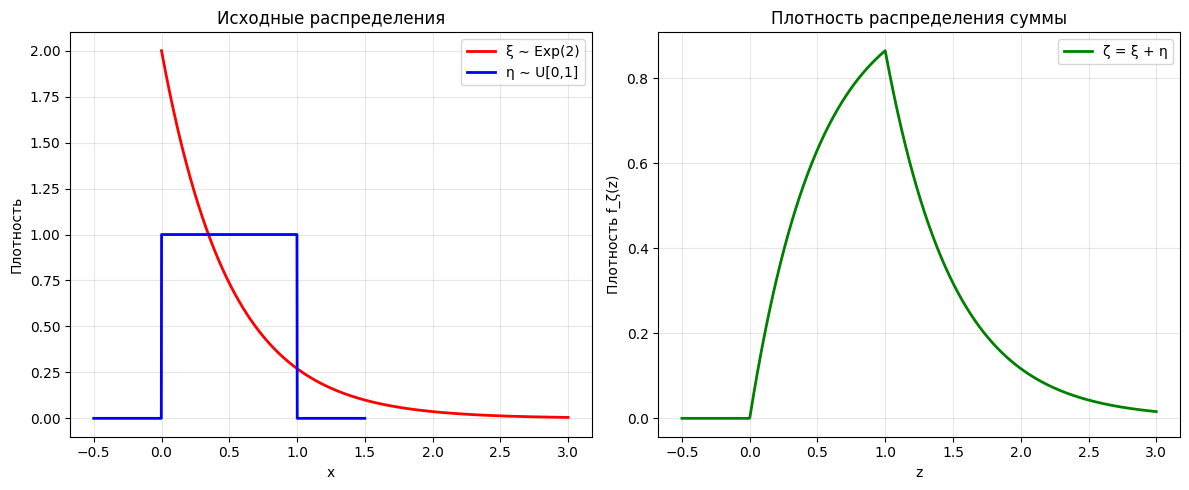


Проверка нормировки: ∫ f_ζ(z) dz = 1.000000
Погрешность: 5.32e-10

Конец лабы:)


In [12]:
print("\nЗадание 5: Плотность суммы распределений")
print("=" * 50)

def sum_density():
    # ξ ∼ Exp(2), η ∼ U[0,1]
    # Найти плотность ζ = ξ + η

    # Аналитическое решение
    # f_ξ(x) = 2e^{-2x}, x ≥ 0
    # f_η(y) = 1, 0 ≤ y ≤ 1

    # f_ζ(z) = ∫ f_ξ(x) f_η(z-x) dx

    def f_xi(x):
        return 2 * np.exp(-2 * x) * (x >= 0)

    def f_eta(y):
        return 1 * ((y >= 0) & (y <= 1))

    def convolution(z):
        # f_ζ(z) = ∫ f_ξ(x) f_η(z-x) dx
        # f_η(z-x) = 1 когда 0 ≤ z-x ≤ 1, т.е. z-1 ≤ x ≤ z
        # и f_ξ(x) = 2e^{-2x} для x ≥ 0

        if z < 0:
            return 0
        elif 0 <= z <= 1:
            # x от 0 до z
            result, _ = integrate.quad(lambda x: 2 * np.exp(-2 * x), 0, z)
            return result
        else:  # z > 1
            # x от z-1 до z
            result, _ = integrate.quad(lambda x: 2 * np.exp(-2 * x), z-1, z)
            return result

    # Вычисляем плотность на сетке
    z_values = np.linspace(-0.5, 3, 1000)
    f_zeta_values = [convolution(z) for z in z_values]

    print("Плотность распределения суммы ζ = ξ + η:")
    print("где ξ ∼ Exp(2), η ∼ U[0,1]")

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Исходные распределения
    x_xi = np.linspace(0, 3, 1000)
    f_xi_vals = f_xi(x_xi)
    ax1.plot(x_xi, f_xi_vals, 'r-', linewidth=2, label='ξ ∼ Exp(2)')

    x_eta = np.linspace(-0.5, 1.5, 1000)
    f_eta_vals = f_eta(x_eta)
    ax1.plot(x_eta, f_eta_vals, 'b-', linewidth=2, label='η ∼ U[0,1]')

    ax1.set_xlabel('x')
    ax1.set_ylabel('Плотность')
    ax1.set_title('Исходные распределения')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Плотность суммы
    ax2.plot(z_values, f_zeta_values, 'g-', linewidth=2, label='ζ = ξ + η')
    ax2.set_xlabel('z')
    ax2.set_ylabel('Плотность f_ζ(z)')
    ax2.set_title('Плотность распределения суммы')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Проверка нормировки
    integral, error = integrate.quad(convolution, -np.inf, np.inf)
    print(f"\nПроверка нормировки: ∫ f_ζ(z) dz = {integral:.6f}")
    print(f"Погрешность: {error:.2e}")

    return z_values, f_zeta_values

z_vals, f_zeta_vals = sum_density()

print("\n" + "=" * 60)
print("Конец лабы:)")